<a href="https://colab.research.google.com/github/xunzxe/first-repository/blob/master/Datathon/DataAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 다음 올림픽 메달은 누가 가져갈까?

## STEP 1. 데이터 불러오기
---

In [2]:
# 라이브러리 가져오기
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [113]:
# 데이터셋 pandas로 불러오기
athlete_path = "/content/athlete_events.csv"
athlete_data = pd.read_csv(athlete_path)
athlete = athlete_data.copy()
print(athlete.shape)
athlete.head()

(271116, 15)


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [115]:
# 'Medal' 데이터 전처리하기
athlete['Medal'].fillna('No', inplace=True)
athlete.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No


In [116]:
regions_path = "/content/noc_regions.csv"
regions_data = pd.read_csv(regions_path)
regions = regions_data.copy()
print(regions.shape)
regions_data.head()

(230, 3)


,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [117]:
# 데이터 합치기

data = athlete.merge(regions, how="left", on="NOC")
print(data.shape)
data.head()

(271116, 17)


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No,Netherlands,NaN


In [118]:
# 하계 올림픽 데이터셋
summer = data[data["Season"] == "Summer"].reset_index(drop=True)
print(summer.shape)
print(len(set(summer["region"])))
summer.head()

(222552, 17)
206


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,No,Netherlands,NaN


In [119]:
# 동계 올림픽 데이터셋
winter = data[data["Season"] == "Winter"].reset_index(drop=True)
print(winter.shape)
print(len(set(winter["region"])))
winter.head()

(48564, 17)
111


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,No,Netherlands,NaN
1,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",No,Netherlands,NaN
2,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,No,Netherlands,NaN
3,5,Christine Jacoba Aaftink,F,25.0,185.0,82.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",No,Netherlands,NaN
4,5,Christine Jacoba Aaftink,F,27.0,185.0,82.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,No,Netherlands,NaN


- 데이터 : 206개국, 271,116명
  - 하계 올림픽 : 206개국, 222,552명
  - 동계 올림픽 : 111개국, 48,564명


## STEP 2. 데이터 살펴보기
---

In [120]:
# 빈 데이터 확인하기

data.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal          0
region       370
notes     266077
dtype: int64

In [39]:
print("국가 :",len(set(data["region"])))
regions = list(set(data["region"]))
print(regions)
print()

print("종목 :",len(set(data["Sport"])))
print("하계 종목 :",len(set(summer["Sport"])))
print("동계 종목 :",len(set(winter["Sport"])))
Sports = list(set(data["Sport"]))
print(Sports)
intersection = set(summer["Sport"])&set(winter["Sport"])
print(intersection)
print()
# 1908년과 1920년에는 피겨 스케이팅 대회가 하계 올림픽과 함께 열렸다

print("메달 :",len(set(data["Medal"])))
medals = list(set(data["Medal"]))
print(medals)
print()

print("년도 :",len(set(data["Year"])))
medals = list(set(data["Year"]))
print(medals)

국가 : 206
['Saint Kitts', 'Barbados', 'Panama', 'Togo', 'Cuba', 'Individual Olympic Athletes', 'Guyana', 'Thailand', 'Central African Republic', 'Saudi Arabia', 'Macedonia', 'Spain', 'Morocco', 'Nepal', 'Belize', 'Germany', 'Niger', 'Angola', 'Sierra Leone', 'Sweden', 'Chile', 'Croatia', 'Gambia', 'Norway', 'Poland', 'Sri Lanka', 'Ivory Coast', 'Comoros', 'Lithuania', 'Nauru', 'Maldives', 'USA', 'Honduras', 'Solomon Islands', 'Senegal', 'Lesotho', 'Belarus', 'Mozambique', 'Burkina Faso', 'Yemen', 'Dominica', 'Namibia', 'China', 'Zimbabwe', 'Andorra', 'Israel', 'Costa Rica', 'Bangladesh', 'Samoa', 'Virgin Islands, US', 'Fiji', 'Estonia', 'Bahrain', 'Saint Lucia', 'Guam', 'Tunisia', 'Venezuela', 'South Sudan', 'Chad', 'Luxembourg', 'Latvia', 'Malaysia', 'Denmark', 'Monaco', 'San Marino', 'Georgia', 'Jordan', 'Antigua', 'Paraguay', 'Grenada', 'Suriname', 'Mauritania', 'Serbia', 'Guinea-Bissau', 'Djibouti', 'Iraq', 'Nicaragua', 'Myanmar', 'Palau', 'Bahamas', 'Cyprus', 'India', 'Saint Vincen

In [139]:
intersection_data = summer[summer['Sport']== 'Alpinism']

intersection_data

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
50924,31056,Gnter Oskar Dyhrenfurth,M,49.0,NaN,NaN,Switzerland,SUI,1936 Summer,1936,Summer,Berlin,Alpinism,Alpinism Mixed Alpinism,Gold,Switzerland,NaN
50926,31057,"Harriet Pauline ""Hettie"" Dyhrenfurth (Heyman-)",F,43.0,NaN,NaN,Switzerland,SUI,1936 Summer,1936,Summer,Berlin,Alpinism,Alpinism Mixed Alpinism,Gold,Switzerland,NaN
175283,107029,Franz Xaver Schmid,M,27.0,NaN,NaN,Germany,GER,1932 Summer,1932,Summer,Los Angeles,Alpinism,Alpinism Mixed Alpinism,Gold,Germany,NaN
175316,107059,"Anton ""Toni"" Schmid",M,22.0,NaN,NaN,Germany,GER,1932 Summer,1932,Summer,Los Angeles,Alpinism,Alpinism Mixed Alpinism,Gold,Germany,NaN


## STEP 3. 데이터 전처리하기
---

### STEP 3-1. MEDAL RATIO

In [121]:
medal_summary = data.pivot_table(index=["region","Sport"], columns="Medal", values="Name", aggfunc="count", fill_value=0).reset_index()
medal_summary['Total'] = medal_summary['Gold'] + medal_summary['Silver'] + medal_summary['Bronze']
medal_summary['Ratio'] = medal_summary['Total'] / (medal_summary['Total'] + medal_summary['No'])
medal_summary = medal_summary[medal_summary['Ratio'] != 0]
medal_summary.sort_values(by=['Ratio','region'], ascending=False).head(20)

Medal,region,Sport,Bronze,Gold,No,Silver,Total,Ratio
3498,Ukraine,Handball,15,0,0,0,15,1.0
3420,USA,Basketball,36,281,0,24,341,1.0
3442,USA,Lacrosse,0,0,0,12,12,1.0
3446,USA,Polo,5,2,0,5,12,1.0
3450,USA,Rugby,0,36,0,0,36,1.0
3458,USA,Softball,0,45,0,15,60,1.0
3356,UK,Alpinism,0,12,0,0,12,1.0
3367,UK,Cricket,0,12,0,9,21,1.0
3384,UK,Lacrosse,0,0,0,12,12,1.0
3389,UK,Polo,5,11,0,14,30,1.0


In [122]:
summer_summary = summer.pivot_table(index=["region","Sport"], columns="Medal", values="Name", aggfunc="count", fill_value=0).reset_index()
summer_summary['Total'] = summer_summary['Gold'] + summer_summary['Silver'] + summer_summary['Bronze']
summer_summary['Ratio'] = summer_summary['Total'] / (summer_summary['Total'] + summer_summary['No'])
summer_summary = summer_summary[summer_summary['Ratio'] != 0]
summer_summary.sort_values(by=['Ratio','region'], ascending=False).head(50)

Medal,region,Sport,Bronze,Gold,No,Silver,Total,Ratio
2895,Ukraine,Handball,15,0,0,0,15,1.000000
2835,USA,Basketball,36,281,0,24,341,1.000000
2849,USA,Ice Hockey,0,0,0,11,11,1.000000
2852,USA,Lacrosse,0,0,0,12,12,1.000000
2854,USA,Polo,5,2,0,5,12,1.000000
2858,USA,Rugby,0,36,0,0,36,1.000000
2862,USA,Softball,0,45,0,15,60,1.000000
2794,UK,Cricket,0,12,0,9,21,1.000000
2807,UK,Lacrosse,0,0,0,12,12,1.000000
2810,UK,Polo,5,11,0,14,30,1.000000


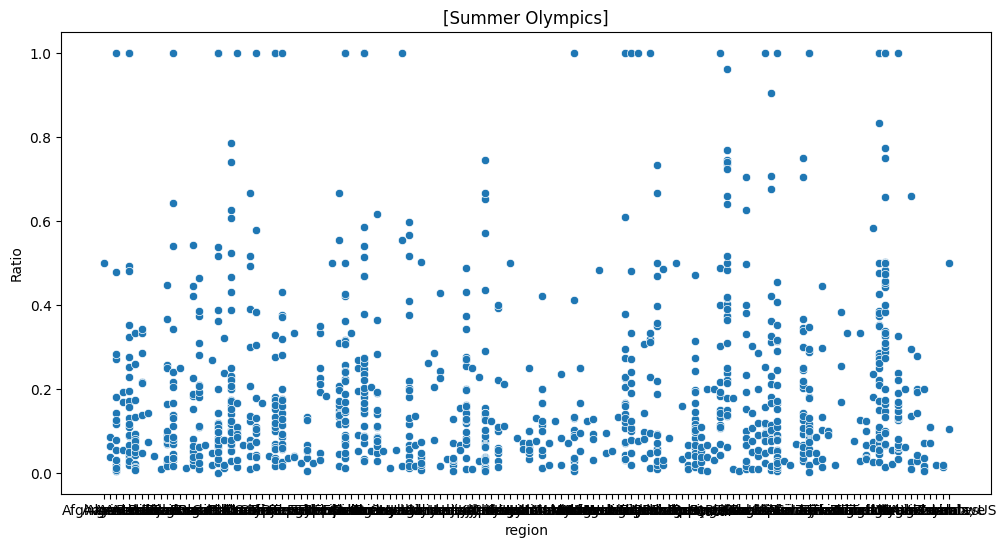

In [123]:
# total 값에 따른 분포 plot

fig, ax = plt.subplots()
fig.set_size_inches(12,6)

sns.scatterplot(data=summer_summary, x="region", y="Ratio", ax=ax)
plt.title("[Summer Olympics]")
plt.show()

In [134]:
# 각 region별로 Ratio 값이 가장 높은 Sport 찾기
idx = summer_summary.groupby('region')['Ratio'].idxmax()  # 각 region별로 Ratio 값이 가장 높은 행의 인덱스

# 최대 Ratio 값을 가진 Sport 추출
next_medal = summer_summary.loc[idx, ['region', 'Sport', 'Ratio']]
# next_medal['Medal'] = (summer_summary['Ratio'] >= 0.9).astype(int)  # Ratio 값이 0.9 이상인 경우 1로 설정 -> 메달 획득 가능성 유

# 결과 출력
pd.DataFrame(next_medal)

Medal,region,Sport,Ratio
5,Afghanistan,Taekwondo,0.500000
16,Algeria,Boxing,0.086957
86,Argentina,Polo,1.000000
112,Armenia,Weightlifting,0.194444
146,Australia,Rugby,1.000000
...,...,...,...
2987,Venezuela,Taekwondo,0.200000
3005,Vietnam,Taekwondo,0.111111
3016,"Virgin Islands, US",Sailing,0.020833
3030,Zambia,Boxing,0.019608


In [ ]:
winter_summary = winter.pivot_table(index=["region","Sport"], columns="Medal", values="Name", aggfunc="count", fill_value=0).reset_index()
winter_summary['Total'] = winter_summary['Gold'] + winter_summary['Silver'] + winter_summary['Bronze']
winter_summary['Ratio'] = winter_summary['Total'] / (winter_summary['Total'] + winter_summary['No'])
winter_summary = winter_summary[winter_summary['Ratio'] != 0]
winter_summary.sort_values(by=['Ratio','region'], ascending=False).head(20)

Medal,region,Sport,Bronze,Gold,No,Silver,Total,Ratio
584,UK,Alpinism,0,12,0,0,12,1.000000
558,Switzerland,Military Ski Patrol,0,4,0,0,4,1.000000
367,Nepal,Alpinism,0,1,0,0,1,1.000000
253,India,Alpinism,0,7,0,0,7,1.000000
200,France,Military Ski Patrol,4,0,0,0,4,1.000000
186,Finland,Military Ski Patrol,0,0,0,4,4,1.000000
102,Canada,Curling,10,23,0,15,48,1.000000
22,Australia,Alpinism,0,1,0,0,1,1.000000
105,Canada,Ice Hockey,35,212,121,93,340,0.737527
460,Russia,Ice Hockey,38,153,172,42,233,0.575309


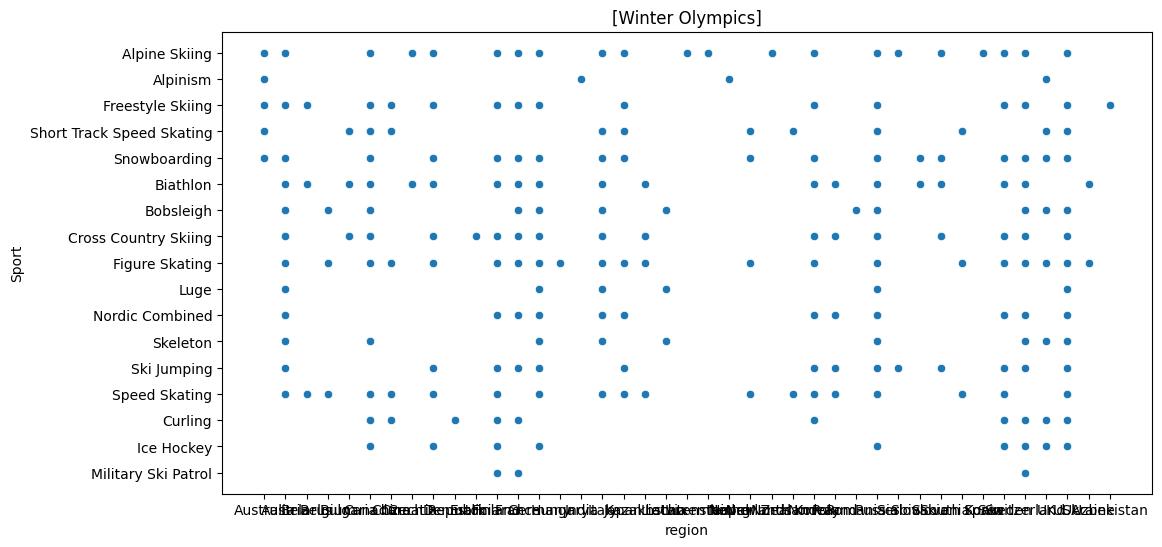

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(12,6)

sns.scatterplot(data=winter_summary, x="region", y="Sport", ax=ax)
plt.title("[Winter Olympics]")
plt.show()

In [ ]:
# 각 region별로 Ratio 값이 가장 높은 Sport 찾기
idx = winter_summary.groupby('region')['Ratio'].idxmax()  # 각 region별로 Ratio 값이 가장 높은 행의 인덱스

# 최대 Ratio 값을 가진 Sport 추출
next_medal = winter_summary.loc[idx, ['region', 'Sport', 'Ratio']]
next_medal['Medal'] = (winter_summary['Ratio'] >= 0.9).astype(int)  # Ratio 값이 0.9 이상인 경우 1로 설정 -> 메달 획득 가능성 유

# 결과 출력
pd.DataFrame(next_medal)

Medal,region,Sport,Ratio,Medal
22,Australia,Alpinism,1.000000,1
43,Austria,Nordic Combined,0.271028,0
55,Belarus,Freestyle Skiing,0.181818,0
62,Belgium,Bobsleigh,0.160714,0
94,Bulgaria,Short Track Speed Skating,0.096774,0
102,Canada,Curling,1.000000,1
125,China,Short Track Speed Skating,0.322368,0
134,Croatia,Biathlon,0.111111,0
149,Czech Republic,Ice Hockey,0.448980,0
161,Denmark,Curling,0.138889,0


- Ratio값이 1에 가까울수록 다음 올림픽에서 메달을 획득할지 아닌지를 예측하는 데에 중요한 컬럼일 것이라는 결론을 내릴 수 있다.

## STEP 3-2. RECENT

In [129]:
# 데이터셋 만들기
summer_recent = summer[['region', 'Sport','Year','Medal']]

# 메달 획득 여부를 숫자로 변환 (금: 3, 은: 2, 동: 1, 노메달: 0)
medal_mapping = {'Gold': 3, 'Silver': 2, 'Bronze': 1, 'No': 0}
summer_recent['Medal'] = summer_recent['Medal'].map(medal_mapping)

summer_recent.head()

<ipython-input-129-79638351002c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summer_recent['Medal'] = summer_recent['Medal'].map(medal_mapping)


,region,Sport,Year,Medal
0,China,Basketball,1992,0
1,China,Judo,2012,0
2,Denmark,Football,1920,0
3,Denmark,Tug-Of-War,1900,3
4,Netherlands,Athletics,1932,0


In [131]:
# 2012년과 2016년 데이터만 필터링
summer_recent = summer_recent[summer_recent['Year'].isin([2012, 2016])]

# 'Medal' >= 1 이상인 데이터만 필터링
summer_recent = summer_recent[summer_recent['Medal'] >= 1]

# 나라 별로 정렬
summer_recent = summer_recent.sort_values(by=['region'])

print(len(summer_recent))
summer_recent.head(20)

3964


,region,Sport,Year,Medal
141559,Afghanistan,Taekwondo,2012,1
120744,Algeria,Athletics,2012,3
120745,Algeria,Athletics,2016,2
120746,Algeria,Athletics,2016,2
42977,Argentina,Sailing,2012,1
186476,Argentina,Hockey,2012,2
126239,Argentina,Hockey,2016,3
28026,Argentina,Sailing,2012,1
28253,Argentina,Hockey,2016,3
9785,Argentina,Hockey,2012,2


In [132]:
filtered_data = []

# 중복되지 않은 region, Sport를 가져와서 하나씩 체크
for region in summer_recent['region'].unique():
    for sport in summer_recent['Sport'].unique():
        # 2012년 데이터와 2016년 데이터를 가져와서 Medal 값이 1 이상인지 확인
        medals_2012 = summer_recent[(summer_recent['Year'] == 2012) & (summer_recent['region'] == region) & (summer_recent['Sport'] == sport)]['Medal'].values
        medals_2016 = summer_recent[(summer_recent['Year'] == 2016) & (summer_recent['region'] == region) & (summer_recent['Sport'] == sport)]['Medal'].values

        # 2012년과 2016년 모두 Medal 값이 1 이상인 경우 filtered_data에 추가
        if len(medals_2012) > 0 and len(medals_2016) > 0 and medals_2012[0] >= 1 and medals_2016[0] >= 1:
            filtered_data.append({'region': region, 'Sport': sport})

# 결과를 데이터프레임으로 변환
filtered_df = pd.DataFrame(filtered_data)

In [133]:
# 결과 출력
filtered_df

,region,Sport
0,Algeria,Athletics
1,Argentina,Sailing
2,Argentina,Hockey
3,Argentina,Tennis
4,Armenia,Wrestling
...,...,...
242,Ukraine,Gymnastics
243,Ukraine,Fencing
244,Uzbekistan,Judo
245,Uzbekistan,Wrestling


In [138]:
pd.DataFrame(next_medal)

Medal,region,Sport,Ratio
5,Afghanistan,Taekwondo,0.500000
16,Algeria,Boxing,0.086957
86,Argentina,Polo,1.000000
112,Armenia,Weightlifting,0.194444
146,Australia,Rugby,1.000000
...,...,...,...
2987,Venezuela,Taekwondo,0.200000
3005,Vietnam,Taekwondo,0.111111
3016,"Virgin Islands, US",Sailing,0.020833
3030,Zambia,Boxing,0.019608


### STEP 3-3. BMI
___

In [84]:
# BMI 계산
data = data.dropna()
data['BMI'] = data['Weight'] / (data['Height'] / 100) ** 2

data.head()

<ipython-input-84-5c22c6662a95>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['BMI'] = data['Weight'] / (data['Height'] / 100) ** 2


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,BMI
734,422,"Julianne ""Anne"" Abernathy",F,34.0,165.0,75.0,United States Virgin Islands,ISV,1988 Winter,1988,Winter,Calgary,Luge,Luge Women's Singles,False,"Virgin Islands, US",Virgin Islands,27.548209
735,422,"Julianne ""Anne"" Abernathy",F,38.0,165.0,75.0,United States Virgin Islands,ISV,1992 Winter,1992,Winter,Albertville,Luge,Luge Women's Singles,False,"Virgin Islands, US",Virgin Islands,27.548209
736,422,"Julianne ""Anne"" Abernathy",F,40.0,165.0,75.0,United States Virgin Islands,ISV,1994 Winter,1994,Winter,Lillehammer,Luge,Luge Women's Singles,False,"Virgin Islands, US",Virgin Islands,27.548209
737,422,"Julianne ""Anne"" Abernathy",F,44.0,165.0,75.0,United States Virgin Islands,ISV,1998 Winter,1998,Winter,Nagano,Luge,Luge Women's Singles,False,"Virgin Islands, US",Virgin Islands,27.548209
738,422,"Julianne ""Anne"" Abernathy",F,48.0,165.0,75.0,United States Virgin Islands,ISV,2002 Winter,2002,Winter,Salt Lake City,Luge,Luge Women's Singles,False,"Virgin Islands, US",Virgin Islands,27.548209


In [ ]:
X = data[['Age', 'Height', 'Weight', 'Sport', 'Medal']]

# 결측치 제거
X = X.dropna()
X = X.fillna('No')

X.head()

,Age,Height,Weight,Sport,Medal
0,24.0,180.0,80.0,Basketball,0
1,23.0,170.0,60.0,Judo,0
7,31.0,172.0,70.0,Badminton,0
8,30.0,159.0,55.5,Sailing,0
9,34.0,159.0,55.5,Sailing,0


In [ ]:
# BMI 계산 (BMI = 몸무게(kg) / (키(m)^2))
X['BMI'] = X['Weight'] / (X['Height'] / 100) ** 2

BMI와 메달 획득 간의 상관계수: 0.0509796065311485
p-value: 2.404257899340271e-96


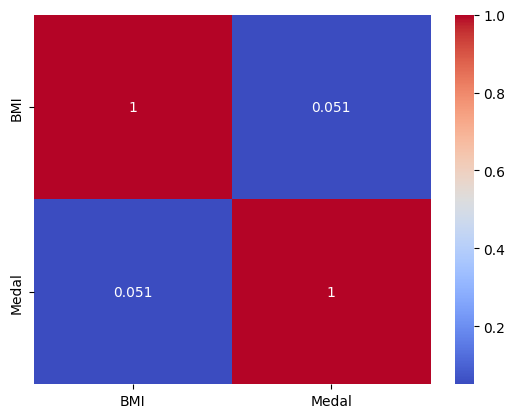

In [ ]:
# 상관관계 계산
correlation = X['BMI'].corr(X['Medal'])
print(f'BMI와 메달 획득 간의 상관계수: {correlation}')

# p-value 계산
from scipy.stats import pearsonr
corr, p_value = pearsonr(X['BMI'], X['Medal'])
print(f'p-value: {p_value}')

# 상관관계 히트맵 그리기
sns.heatmap(X[['BMI', 'Medal']].corr(), annot=True, cmap='coolwarm')
plt.show()

## STEP 4. 모델 만들기
---

In [41]:
data.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'region', 'notes'],
      dtype='object')

In [51]:
# 필요한 라이브러리 설치
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [97]:
# 필요한 열만 선택
data1 = data[['region', 'Sport', 'Medal']]

# 'Gold', 'Silver', 'Bronze' 메달을 True로 설정하고, 그 외는 False로 설정
athlete['Medal'] = athlete['Medal'].apply(lambda x: True if x in ['Gold', 'Silver', 'Bronze'] else False)
athlete.head()

data1.head()

,region,Sport,Medal
734,10,22,False
735,10,22,False
736,10,22,False
737,10,22,False
738,10,22,False


In [98]:
# 레이블 인코딩 (숫자로 변환)
le_region = LabelEncoder()
le_sport = LabelEncoder()

data['region'] = le_region.fit_transform(data['region'])
data['Sport'] = le_sport.fit_transform(data['Sport'])

# 특징과 레이블 분리
X = data[['region', 'Sport']]
y = data['Medal']

# 훈련 및 테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 초기화 및 훈련
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [101]:
# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test)

# 모델 평가
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.889367816091954
              precision    recall  f1-score   support

       False       0.94      0.94      0.94       613
        True       0.54      0.53      0.53        83

    accuracy                           0.89       696
   macro avg       0.74      0.73      0.74       696
weighted avg       0.89      0.89      0.89       696



In [105]:
# 새로운 입력 데이터
new_data = pd.DataFrame({
    'region': ['China', 'UK'],
    'Sport': ['Judo', 'Alpinism'],
})

# 새로운 데이터를 인코딩하는 함수
def encode_new_data(new_data, le_region, le_sport):
    # 인코딩할 데이터프레임 복사
    new_data_encoded = new_data.copy()

    # region 인코딩
    new_data_encoded['region'] = new_data_encoded['region'].apply(lambda x: le_region.transform([x])[0] if x in le_region.classes_ else -1)

    # Sport 인코딩
    new_data_encoded['Sport'] = new_data_encoded['Sport'].apply(lambda x: le_sport.transform([x])[0] if x in le_sport.classes_ else -1)

    return new_data_encoded

# 인코딩
new_data_encoded = encode_new_data(new_data, le_region, le_sport)

# 예측
predictions = model.predict(new_data_encoded)

# 예측 결과 추가
new_data['Medal'] = predictions
new_data

,region,Sport,Medal
0,China,Judo,False
1,UK,Alpinism,False


## Cluster analysis

In [ ]:
# 라이브러리 가져오기

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')
import matplotlib.cm
cmap = matplotlib.cm.get_cmap('plasma')
from sklearn.cluster import KMeans

In [ ]:
summer.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,No,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,No,Netherlands,NaN


In [61]:
# 선수 정보로 이루어진 데이터셋 만들기
X = summer[['Age', 'Height', 'Weight', 'Sport']]
X = X.dropna()
X = pd.get_dummies(X, columns = ['Sport'])
print(X.shape)
X.head()

(166706, 46)


,Age,Height,Weight,Sport_Archery,Sport_Art Competitions,Sport_Athletics,Sport_Badminton,Sport_Baseball,Sport_Basketball,Sport_Beach Volleyball,...,Sport_Table Tennis,Sport_Taekwondo,Sport_Tennis,Sport_Trampolining,Sport_Triathlon,Sport_Tug-Of-War,Sport_Volleyball,Sport_Water Polo,Sport_Weightlifting,Sport_Wrestling
0,24.0,180.0,80.0,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,23.0,170.0,60.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,31.0,172.0,70.0,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,30.0,159.0,55.5,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,34.0,159.0,55.5,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [68]:
# 선수 정보로 이루어진 데이터셋 만들기
X = summer[['Age', 'Height', 'Weight']]
X = X.dropna()
print(X.shape)
X.head()

(166706, 3)


,Age,Height,Weight
0,24.0,180.0,80.0
1,23.0,170.0,60.0
7,31.0,172.0,70.0
8,30.0,159.0,55.5
9,34.0,159.0,55.5


In [ ]:
# 최적의 군집수 찾기

wcss = []
for i in range(1, 21):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit_transform(X)
    wcss.append(kmeans.inertia_)

In [ ]:
wcss

[61858470.9830723,
 29636842.000630423,
 20715462.21960713,
 16664973.834485278,
 14475378.363262352,
 12966897.150332589,
 11620294.339443214,
 10707683.638056964,
 9967036.337006964,
 9374377.068373853,
 8868416.031786663,
 8364722.05622975,
 7955942.296105729,
 7611259.643961547,
 7277693.028805849,
 6984411.846465427,
 6737281.356621587,
 6476203.418145655,
 6286567.410193202,
 6090440.439588071]

<function matplotlib.pyplot.show(close=None, block=None)>

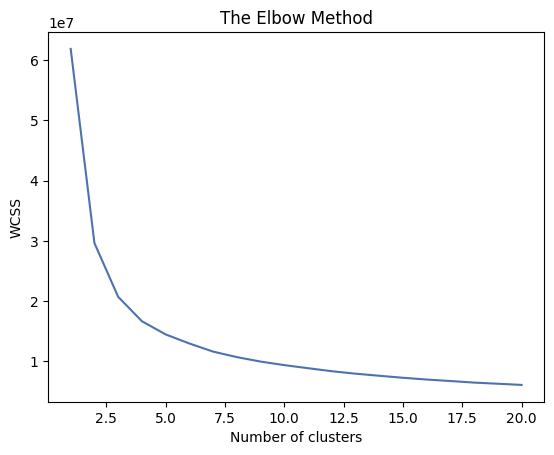

In [ ]:
# 꺽은선 도표로 보기
plt.figure()
plt.plot(range(1, 21), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show

In [ ]:
# 군집수 k = 4 결정 후 모델 학습과 예측
k = 4
kmeans = KMeans(n_clusters=k)
y_kmeans = kmeans.fit_predict(X)
y_kmeans

array([1, 2, 2, ..., 1, 1, 2], dtype=int32)

In [ ]:
# 데이터 병합
Group_cluster = pd.DataFrame(y_kmeans, columns=['Group'])
full_data = pd.concat( [X, Group_cluster], axis=1)
full_data.head()

,Age,Height,Weight,Group
0,24.0,180.0,80.0,1.0
1,23.0,170.0,60.0,2.0
7,31.0,172.0,70.0,2.0
8,30.0,159.0,55.5,2.0
9,34.0,159.0,55.5,2.0


In [ ]:
# 군집의 특성과 해석
kmeans_pred = KMeans(n_clusters=k, random_state = 42).fit(X)
kmeans_pred.cluster_centers_

array([[ 26.62801196, 191.64138593,  99.01639298],
       [ 25.38641817, 172.75063274,  65.75284324],
       [ 22.78698258, 161.53433597,  53.17624489],
       [ 25.65029657, 182.89874697,  78.71655255]])

- 군집 0의 평균 : 연령 26, 키 191, 몸무게 99
- 군집 1의 평균 : 연령 25, 키 172, 몸무게 65
- 군집 2의 평균 : 연령 22, 키 161, 몸무게 53
- 군집 3의 평균 : 연령 25, 키 182, 몸무게 78

In [ ]:
# 새로운 데이터 예측하기
kmeans_pred.predict([[28, 181, 70]])

array([3], dtype=int32)

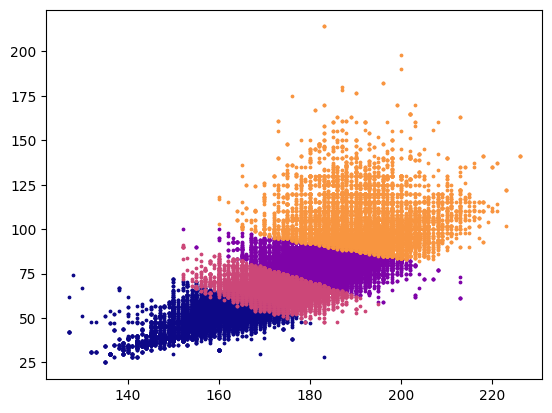

In [ ]:
# 산점도 그리기
X = np.array(X)
plt.figure()
for i in range(k):
  plt.scatter(X[y_kmeans == i, 1], X[y_kmeans == i, 2], s = 3, c = cmap(i/k), label = f'Cluster {i}')

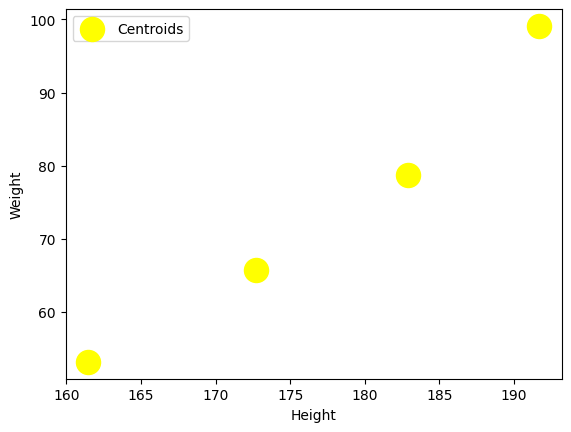

In [ ]:
# 각 군집의 중심좌표 찾기
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s = 300, c = 'yellow', label = 'Centroids')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend()
plt.show()

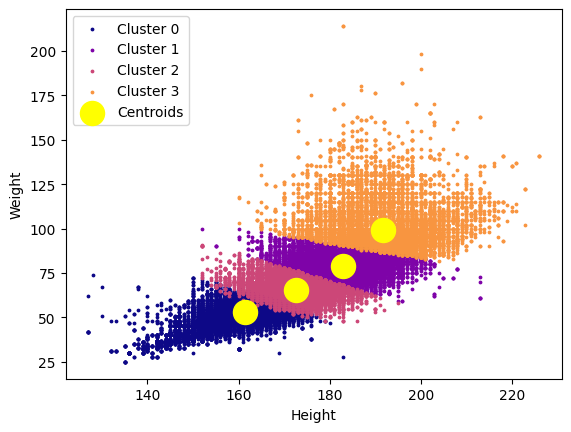

In [ ]:
# 각 개체의 좌표와 군집 중심의 좌표 합치기
plt.figure()
for i in range(k):
  plt.scatter(X[y_kmeans == i, 1], X[y_kmeans == i, 2], s = 3, c = cmap(i/k), label = f'Cluster {i}')
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], s = 300, c = 'yellow', label = 'Centroids')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.legend()
plt.show()